# ОФФЛАЙН-МЕТРИКИ



##  ПЛАН ПРАКТИЧЕСКОЙ ЧАСТИ

## **1. ПОДГОТОВКА ДАННЫХ**
- Загрузка датасета KION (взаимодействия + метаданные)
- Обработка временных меток и пропусков
- Создание словаря фильмов для читаемых рекомендаций

## **2. КОНТРОЛЬ УТЕЧКИ ДАННЫХ**
- **3 метода разделения**: случайное, временное, hold-out последнего
- Детальная проверка временных границ
- Анализ пересечений пользователей и фильмов
- Автоматический выбор метода без утечки

## **3. РЕАЛИЗАЦИЯ АЛГОРИТМОВ**
- **Random** - случайные рекомендации (бейзлайн)
- **Popularity** - популярные фильмы
- **Weighted Matrix** - весовые модели из предыдущего занятия

## **4. КОМПЛЕКСНАЯ ОЦЕНКА**
- **Основные метрики**: Precision@10, Recall@10, NDCG@10, MAP@10
- **Метрики разнообразия**: Coverage, Personal Coverage
- **Статистика**: уникальные рекомендации, пользователи, время оценки

## **5. ВИЗУАЛИЗАЦИЯ И АНАЛИЗ**
- Сравнительные графики всех метрик
- Компромисс: Качество vs Разнообразие
- Анализ конкретных рекомендаций с названиями фильмов
- Итоговые выводы по лучшей модели


In [ ]:
! wget https://github.com/RShoose/Data/raw/main/implicit_interactions_matrix.npz

--2025-09-30 14:22:23--  https://github.com/RShoose/Data/raw/main/implicit_interactions_matrix.npz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/implicit_interactions_matrix.npz [following]
--2025-09-30 14:22:24--  https://raw.githubusercontent.com/RShoose/Data/main/implicit_interactions_matrix.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13159003 (13M) [application/octet-stream]
Saving to: ‘implicit_interactions_matrix.npz’

implicit_interactio 100%[===================>]  12.55M  --.-KB/s    in 0.1s    

2025-09-30 14:22:24 (102 MB/s) - ‘implicit_interactions_matrix.n

In [ ]:
! wget https://github.com/RShoose/Data/raw/main/full_context_interactions_matrix.npz

--2025-09-30 14:22:24--  https://github.com/RShoose/Data/raw/main/full_context_interactions_matrix.npz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/full_context_interactions_matrix.npz [following]
--2025-09-30 14:22:25--  https://raw.githubusercontent.com/RShoose/Data/main/full_context_interactions_matrix.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13877757 (13M) [application/octet-stream]
Saving to: ‘full_context_interactions_matrix.npz’

full_context_intera 100%[===================>]  13.23M  --.-KB/s    in 0.1s    

2025-09-30 14:22:25 (106 MB/s) - ‘full_context_i

In [ ]:
! wget https://github.com/RShoose/Data/raw/main/user_mapping.pkl

--2025-09-30 14:22:25--  https://github.com/RShoose/Data/raw/main/user_mapping.pkl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/user_mapping.pkl [following]
--2025-09-30 14:22:25--  https://raw.githubusercontent.com/RShoose/Data/main/user_mapping.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13493577 (13M) [application/octet-stream]
Saving to: ‘user_mapping.pkl’

user_mapping.pkl    100%[===================>]  12.87M  71.8MB/s    in 0.2s    

2025-09-30 14:22:26 (71.8 MB/s) - ‘user_mapping.pkl’ saved [13493577/13493577]



In [ ]:
! wget https://github.com/RShoose/Data/raw/main/item_mapping.pkl

--2025-09-30 14:22:26--  https://github.com/RShoose/Data/raw/main/item_mapping.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/item_mapping.pkl [following]
--2025-09-30 14:22:26--  https://raw.githubusercontent.com/RShoose/Data/main/item_mapping.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277986 (271K) [application/octet-stream]
Saving to: ‘item_mapping.pkl’

item_mapping.pkl    100%[===================>] 271.47K  --.-KB/s    in 0.04s   

2025-09-30 14:22:26 (7.16 MB/s) - ‘item_mapping.pkl’ saved [277986/277986]



In [ ]:
!wget https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/items.csv
!wget https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/interactions.csv.zip
!unzip interactions.csv.zip

--2025-09-30 14:22:27--  https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/items.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31836561 (30M) [text/plain]
Saving to: ‘items.csv’

items.csv           100%[===================>]  30.36M   134MB/s    in 0.2s    

2025-09-30 14:22:28 (134 MB/s) - ‘items.csv’ saved [31836561/31836561]

--2025-09-30 14:22:28--  https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/interactions.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18651415 (18M) [ap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
import time
from datetime import datetime, timedelta
from scipy.sparse import load_npz
import pickle
import warnings
warnings.filterwarnings('ignore')


In [ ]:
interactions = pd.read_csv('interactions.csv')
items = pd.read_csv('items.csv')
print("АНАЛИЗ ДАННЫХ")

interactions['last_watch_dt'] = pd.to_datetime(interactions['last_watch_dt'], errors='coerce')
interactions = interactions.dropna(subset=['last_watch_dt'])
interactions['total_dur'] = interactions['total_dur'].fillna(0)
interactions['watched_pct'] = interactions['watched_pct'].fillna(0)
display(items.head())
print("\n" + '='*70)
display(interactions.head())
print("\n" + '='*70)
print("1. БАЗОВАЯ СТАТИСТИКА ДАННЫХ:")
print(f"   - Общее количество взаимодействий: {len(interactions):,}")
print(f"   - Уникальных пользователей: {interactions['user_id'].nunique():,}")
print(f"   - Уникальных объектов: {interactions['item_id'].nunique():,}")
print(f"   - Период данных: {interactions['last_watch_dt'].min()} - {interactions['last_watch_dt'].max()}")

АНАЛИЗ ДАННЫХ


,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250.0,72.0
1,699317,1659,2021-05-29,8317.0,100.0
2,656683,7107,2021-05-09,10.0,0.0
3,864613,7638,2021-07-05,14483.0,100.0
4,964868,9506,2021-04-30,6725.0,100.0



1. БАЗОВАЯ СТАТИСТИКА ДАННЫХ:
   - Общее количество взаимодействий: 1,594,786
   - Уникальных пользователей: 567,588
   - Уникальных объектов: 12,693
   - Период данных: 2021-03-13 00:00:00 - 2021-08-22 00:00:00


### СОЗДАЕМ СЛОВАРЬ ДЛЯ ПРЕОБРАЗОВАНИЯ ID В НАЗВАНИЯ ФИЛЬМОВ

In [ ]:
items_dict = items.set_index('item_id')[['title', 'genres', 'release_year', 'content_type']].to_dict('index')
print(f"\n Загружено информации о {len(items_dict)} фильмах/сериалах")


 Загружено информации о 15963 фильмах/сериалах


### ЗАГРУЗКА МАТРИЦ ИЗ ПРЕДЫДУЩЕГО ЗАНЯТИЯ

In [ ]:
try:
    matrix_implicit = load_npz('implicit_interactions_matrix.npz')
    matrix_full_context = load_npz('full_context_interactions_matrix.npz')

    with open('user_mapping.pkl', 'rb') as f:
        user_map = pickle.load(f)
    with open('item_mapping.pkl', 'rb') as f:
        item_map = pickle.load(f)

    print(" Матрицы из предыдущего ноутбука загружены")
    print(f"   Implicit matrix: {matrix_implicit.shape}")
    print(f"   Full context matrix: {matrix_full_context.shape}")

    MATRICES_LOADED = True
except Exception as e:
    print(f" Матрицы не найдены: {e}")
    print("   Работаем только с базовыми моделями")
    MATRICES_LOADED = False

 Матрицы из предыдущего ноутбука загружены
   Implicit matrix: (567576, 12640)
   Full context matrix: (567576, 12640)


### ФУНКЦИЯ ДЛЯ ПОЛУЧЕНИЯ ИНФОРМАЦИИ О ФИЛЬМЕ

In [ ]:
# функция для получения информации о фильме
def get_movie_info(item_id):
    """возвращает информацию о фильме по ID"""
    if item_id in items_dict:
        info = items_dict[item_id]
        title = info.get('title', 'Неизвестно')
        genres = info.get('genres', 'Неизвестно')
        year = info.get('release_year', 'Неизвестно')
        content_type = info.get('content_type', 'Неизвестно')

        # форматируем жанры
        if isinstance(genres, str) and genres.startswith('['):
            try:
                genres_list = eval(genres)
                genres_str = ', '.join(genres_list[:3]) + ('...' if len(genres_list) > 3 else '')
            except:
                genres_str = str(genres)[:50]
        else:
            genres_str = str(genres)[:50]

        return {
            'title': title,
            'genres': genres_str,
            'year': year,
            'type': content_type
        }
    else:
        return {
            'title': f'Фильм {item_id}',
            'genres': 'Неизвестно',
            'year': 'Неизвестно',
            'type': 'Неизвестно'
        }


## БАЗОВЫЕ АЛГОРИТМЫ РЕКОМЕНДАТОРОВ

In [ ]:
class ComprehensiveRecommender:
    """базовый с комплексными метриками"""

    def __init__(self, all_items):
        self.all_items = np.array(all_items)

    def recommend(self, user_seen_items, k=10):
        seen_set = set(user_seen_items)
        available_items = [item for item in self.all_items if item not in seen_set]

        if len(available_items) < k:
            return available_items

        indices = np.random.choice(len(available_items), size=k, replace=False)
        return [available_items[i] for i in indices]

class ComprehensivePopularityRecommender:
    """popularity  с комплексными метриками"""

    def __init__(self):
        self.popular_items = None

    def fit(self, train_data):
        self.popular_items = train_data['item_id'].value_counts().index.tolist()

    def recommend(self, user_seen_items, k=10):
        if not self.popular_items:
            return []

        seen_set = set(user_seen_items)
        recs = []
        for item in self.popular_items:
            if item not in seen_set:
                recs.append(item)
                if len(recs) >= k:
                    break
        return recs

class WeightedMatrixRecommender:
    """ использующий весовые матрицы"""

    def __init__(self, weight_matrix, user_map, item_map):
        self.weight_matrix = weight_matrix
        self.user_map = user_map
        self.item_map = item_map
        self.item_popularity = None

    def fit(self):
        # суммируем веса по колонкам (популярность items)
        item_weights = np.array(self.weight_matrix.sum(axis=0)).flatten()
        # сортируем индексы по убыванию веса
        self.sorted_item_indices = np.argsort(-item_weights)

    def recommend(self, user_seen_items, k=10):
        if self.sorted_item_indices is None:
            self.fit()

        seen_set = set(user_seen_items)
        recs = []

        # создаем обратный маппинг: индекс матрицы -> item_id
        idx_to_item = {idx: item_id for item_id, idx in self.item_map.items()}

        for matrix_idx in self.sorted_item_indices:
            if matrix_idx in idx_to_item:
                item_id = idx_to_item[matrix_idx]
                if item_id not in seen_set:
                    recs.append(item_id)
                    if len(recs) >= k:
                        break
        return recs

### ФУНКЦИИ РАЗДЕЛЕНИЯ ДАННЫХ С ДЕТАЛЬНЫМ КОНТРОЛЕМ УТЕЧКИ

In [ ]:
# функции разделения данных с анализом утечки
def split_random(interactions, test_size=0.2):
    """случайное разделение"""
    start_time = time.time()
    train, test = train_test_split(interactions, test_size=test_size, random_state=42)
    elapsed = time.time() - start_time

    print("СЛУЧАЙНОЕ РАЗДЕЛЕНИЕ:")
    print(f"  Train: {len(train):,} записей")
    print(f"  Test: {len(test):,} записей")

    # анализ утечки
    train_max_date = train['last_watch_dt'].max()
    test_min_date = test['last_watch_dt'].min()
    leakage = test_min_date < train_max_date

    if leakage:
        print("  ОБНАРУЖЕНА УТЕЧКА ДАННЫХ!")
        print(f"     test_min_date ({test_min_date}) < train_max_date ({train_max_date})")
    else:
        print("  Утечки данных нет")

    return train, test, elapsed, leakage

def split_temporal_global(interactions, test_ratio=0.2):
    """глобальное разделение по времени"""
    start_time = time.time()
    interactions_sorted = interactions.sort_values('last_watch_dt')
    split_idx = int(len(interactions_sorted) * (1 - test_ratio))
    split_date = interactions_sorted.iloc[split_idx]['last_watch_dt']

    train = interactions_sorted[interactions_sorted['last_watch_dt'] < split_date]
    test = interactions_sorted[interactions_sorted['last_watch_dt'] >= split_date]

    elapsed = time.time() - start_time

    print("ВРЕМЕННОЕ РАЗДЕЛЕНИЕ:")
    print(f"  Train: {len(train):,} записей ({train['last_watch_dt'].min()} - {train['last_watch_dt'].max()})")
    print(f"  Test: {len(test):,} записей ({test['last_watch_dt'].min()} - {test['last_watch_dt'].max()})")
    print(f"  Дата разделения: {split_date}")

    # анализ утечки
    train_max_date = train['last_watch_dt'].max()
    test_min_date = test['last_watch_dt'].min()
    leakage = test_min_date < train_max_date

    if leakage:
        print("  ОБНАРУЖЕНА УТЕЧКА ДАННЫХ!")
        print(f"     test_min_date ({test_min_date}) < train_max_date ({train_max_date})")
    else:
        print("  Утечки данных нет")

    return train, test, elapsed, leakage

def split_holdout_last(interactions):
    """hold-out последнего взаимодействия для каждого пользователя"""
    start_time = time.time()

    # отбираем пользователей с >=2 взаимодействиями
    user_counts = interactions.groupby('user_id').size()
    valid_users = user_counts[user_counts >= 2].index
    interactions_valid = interactions[interactions['user_id'].isin(valid_users)]

    # находим последние взаимодействия для каждого пользователя
    last_interactions = interactions_valid.sort_values('last_watch_dt').groupby('user_id').tail(1)
    test = last_interactions
    train = interactions_valid[~interactions_valid.index.isin(last_interactions.index)]

    elapsed = time.time() - start_time

    print("HOLD-OUT ПОСЛЕДНЕГО ВЗАИМОДЕЙСТВИЯ:")
    print(f"  Train: {len(train):,} записей")
    print(f"  Test: {len(test):,} записей")
    print(f"  Пользователей с >=2 взаимодействиями: {len(valid_users):,}")

    # анализ утечки
    train_users = set(train['user_id'])
    test_users = set(test['user_id'])
    common_users = train_users & test_users

    print(f"  Общие пользователи в train и test: {len(common_users):,}")

    # проверка временной утечки для общих пользователей
    leakage_found = False
    for user_id in common_users:
        user_train_max = train[train['user_id'] == user_id]['last_watch_dt'].max()
        user_test_min = test[test['user_id'] == user_id]['last_watch_dt'].min()
        if user_test_min < user_train_max:
            leakage_found = True
            break

    if leakage_found:
        print("  ОБНАРУЖЕНА УТЕЧКА ДАННЫХ!")
    else:
        print("  Утечки данных нет")

    return train, test, elapsed, leakage_found

# анализ всех методов разделения и выбор лучшего
print("АНАЛИЗ МЕТОДОВ РАЗДЕЛЕНИЯ ДАННЫХ")
print("=" * 60)

split_methods = [
    ('Случайное', split_random),
    ('Временное', split_temporal_global),
    ('Hold-out последнего', split_holdout_last)
]

best_split = None
best_split_name = None
best_split_leakage = True  # начинаем с True, ищем без утечки

for split_name, split_func in split_methods:
    print(f"\n{'-'*50}")
    print(f"ТЕСТИРУЕМ: {split_name}")
    print(f"{'-'*50}")

    if split_name == 'Случайное':
        train, test, time_taken, leakage = split_func(interactions)
    elif split_name == 'Временное':
        train, test, time_taken, leakage = split_func(interactions)
    else:
        train, test, time_taken, leakage = split_func(interactions)

    # выбираем разделение без утечки
    if not leakage and best_split_leakage:
        best_split = (train, test)
        best_split_name = split_name
        best_split_leakage = False
        print(f"ВЫБРАНО КАК ЛУЧШЕЕ РАЗДЕЛЕНИЕ")

print(f"\n{'='*60}")
print("ИТОГ ВЫБОРА МЕТОДА РАЗДЕЛЕНИЯ:")

if best_split_name:
    print(f"ВЫБРАН МЕТОД: {best_split_name}")
    print(f"Причина: нет утечки данных")
    train, test = best_split
else:
    print("ВНИМАНИЕ: Все методы имеют утечку данных!")
    print("Используем временное разделение как наиболее надежное")
    train, test, _, _ = split_temporal_global(interactions)
    best_split_name = "Временное"

print(f"\nФИНАЛЬНОЕ РАЗДЕЛЕНИЕ:")
print(f"  Train: {len(train):,} записей")
print(f"  Test: {len(test):,} записей")
print(f"  Общие пользователи: {len(set(train['user_id']) & set(test['user_id'])):,}")

# используем выбранное разделение для оценки моделей
print(f"\nИСПОЛЬЗУЕМ РАЗДЕЛЕНИЕ '{best_split_name}' ДЛЯ ОЦЕНКИ МОДЕЛЕЙ")
print("=" * 60)

АНАЛИЗ МЕТОДОВ РАЗДЕЛЕНИЯ ДАННЫХ

--------------------------------------------------
ТЕСТИРУЕМ: Случайное
--------------------------------------------------
СЛУЧАЙНОЕ РАЗДЕЛЕНИЕ:
  Train: 1,275,828 записей
  Test: 318,958 записей
  ОБНАРУЖЕНА УТЕЧКА ДАННЫХ!
     test_min_date (2021-03-13 00:00:00) < train_max_date (2021-08-22 00:00:00)

--------------------------------------------------
ТЕСТИРУЕМ: Временное
--------------------------------------------------
ВРЕМЕННОЕ РАЗДЕЛЕНИЕ:
  Train: 1,273,597 записей (2021-03-13 00:00:00 - 2021-08-03 00:00:00)
  Test: 321,189 записей (2021-08-04 00:00:00 - 2021-08-22 00:00:00)
  Дата разделения: 2021-08-04 00:00:00
  Утечки данных нет
ВЫБРАНО КАК ЛУЧШЕЕ РАЗДЕЛЕНИЕ

--------------------------------------------------
ТЕСТИРУЕМ: Hold-out последнего
--------------------------------------------------
HOLD-OUT ПОСЛЕДНЕГО ВЗАИМОДЕЙСТВИЯ:
  Train: 1,027,198 записей
  Test: 284,999 записей
  Пользователей с >=2 взаимодействиями: 284,999
  Общие пользовател

### ФУНКЦИЯ ОЦЕНКИ

In [ ]:
def comprehensive_evaluate_metrics(recommender, test_data, user_seen_items_dict, all_items, k=10):
    """комплексная оценка со всеми метриками"""

    test_user_items = test_data.groupby('user_id')['item_id'].agg(list).to_dict()

    metrics = {
        'precision': [],
        'recall': [],
        'ndcg': [],
        'map': []
    }

    # для coverage и анализа
    all_recommended_items = set()
    user_coverage = []  # персонализированное coverage

    for user_id, true_items in test_user_items.items():
        user_history = user_seen_items_dict.get(user_id, set())
        recs = recommender.recommend(user_history, k)

        if not recs:
            # если нет рекомендаций - нулевые метрики
            for key in ['precision', 'recall', 'ndcg', 'map']:
                metrics[key].append(0)
            user_coverage.append(0)
            continue

        # добавляем в общий пул для coverage
        all_recommended_items.update(recs)

        # персонализированное coverage
        user_catalog_size = len([item for item in all_items if item not in user_history])
        user_rec_coverage = len(recs) / user_catalog_size if user_catalog_size > 0 else 0
        user_coverage.append(user_rec_coverage)

        rec_set = set(recs)
        true_set = set(true_items)
        hits = rec_set & true_set

        # базовые метрики
        precision = len(hits) / len(recs)
        recall = len(hits) / len(true_set) if true_set else 0

        metrics['precision'].append(precision)
        metrics['recall'].append(recall)

        # NDCG
        relevance = [1 if item in true_set else 0 for item in recs]
        if sum(relevance) > 0:
            ideal = sorted(relevance, reverse=True)
            dcg = sum(r / np.log2(i + 2) for i, r in enumerate(relevance))
            idcg = sum(r / np.log2(i + 2) for i, r in enumerate(ideal))
            ndcg = dcg / idcg
        else:
            ndcg = 0
        metrics['ndcg'].append(ndcg)

        # MAP (Mean Average Precision)
        ap = 0
        hit_count = 0
        for i, item in enumerate(recs):
            if item in true_set:
                hit_count += 1
                ap += hit_count / (i + 1)
        ap = ap / len(true_set) if true_set else 0
        metrics['map'].append(ap)

    # глобальные метрики
    catalog_size = len(all_items)
    coverage = len(all_recommended_items) / catalog_size if catalog_size > 0 else 0
    personal_coverage = np.mean(user_coverage)

    return {
        # основные метрики качества
        'precision@10': np.mean(metrics['precision']),
        'recall@10': np.mean(metrics['recall']),
        'ndcg@10': np.mean(metrics['ndcg']),
        'map@10': np.mean(metrics['map']),

        # метрики разнообразия
        'coverage': coverage,
        'personal_coverage': personal_coverage,
        'catalog_size': catalog_size,
        'recommended_unique': len(all_recommended_items),

        # статистика
        'users_evaluated': len(test_user_items),
        'avg_test_items_per_user': np.mean([len(items) for items in test_user_items.values()])
    }

### КОМПЛЕКСНАЯ ОЦЕНКА МЕТРИК

In [ ]:
# основная функция оценки с использованием выбранного разделения
def run_comprehensive_evaluation():
    """запуск комплексной оценки всех моделей с выбранным разделением"""

    all_items = interactions['item_id'].unique()
    results = []

    # все модели для сравнения
    models = [
        ('Random', ComprehensiveRecommender),
        ('Popularity', ComprehensivePopularityRecommender)
    ]

    # добавляем весовые модели если матрицы загружены
    if MATRICES_LOADED:
        models.extend([
            ('Weighted_Implicit', lambda: WeightedMatrixRecommender(matrix_implicit, user_map, item_map)),
            ('Weighted_Full', lambda: WeightedMatrixRecommender(matrix_full_context, user_map, item_map))
        ])

    print(f"ОЦЕНКА МОДЕЛЕЙ НА РАЗДЕЛЕНИИ '{best_split_name}'")
    print("=" * 50)

    # используем уже выбранное разделение (train, test уже определены)
    user_seen_items = train.groupby('user_id')['item_id'].agg(set).to_dict()
    common_users = set(test['user_id']) & set(train['user_id'])
    test_filtered = test[test['user_id'].isin(common_users)]

    print(f"Тренировочных данных: {len(train):,}")
    print(f"Тестовых данных: {len(test_filtered):,}")
    print(f"Пользователей в тесте: {len(common_users):,}")

    for model_name, model_class in models:
        print(f"Оценка {model_name}...")

        try:
            # инициализация и обучение модели
            if 'Weighted' in model_name:
                if 'Implicit' in model_name:
                    recommender = WeightedMatrixRecommender(matrix_implicit, user_map, item_map)
                else:
                    recommender = WeightedMatrixRecommender(matrix_full_context, user_map, item_map)
                recommender.fit()
            else:
                if model_name == 'Random':
                    recommender = model_class(all_items)
                else:
                    recommender = model_class()
                    recommender.fit(train)

            # комплексная оценка
            start_time = time.time()
            metrics = comprehensive_evaluate_metrics(recommender, test_filtered, user_seen_items, all_items)
            eval_time = time.time() - start_time

            results.append({
                'Модель': model_name,
                'Метод_разделения': best_split_name,
                # основные метрики качества
                'Precision@10': metrics['precision@10'],
                'Recall@10': metrics['recall@10'],
                'NDCG@10': metrics['ndcg@10'],
                'MAP@10': metrics['map@10'],
                # метрики разнообразия
                'Coverage': metrics['coverage'],
                'Personal_Coverage': metrics['personal_coverage'],
                'Уникальных_рекомендаций': metrics['recommended_unique'],
                # статистика
                'Пользователей_оценено': metrics['users_evaluated'],
                'Ср_тестовых_на_пользователя': metrics['avg_test_items_per_user'],
                'Время_оценки_сек': eval_time
            })

            print(f"NDCG: {metrics['ndcg@10']:.4f}, Precision: {metrics['precision@10']:.4f}, Coverage: {metrics['coverage']:.2%}")

        except Exception as e:
            print(f"Ошибка: {e}")

    return pd.DataFrame(results)

# запуск основной оценки
results_df = run_comprehensive_evaluation()

ОЦЕНКА МОДЕЛЕЙ НА РАЗДЕЛЕНИИ 'Временное'
Тренировочных данных: 1,273,597
Тестовых данных: 162,161
Пользователей в тесте: 75,014
Оценка Random...
NDCG: 0.0008, Precision: 0.0002, Coverage: 100.00%
Оценка Popularity...
NDCG: 0.1032, Precision: 0.0202, Coverage: 0.15%
Оценка Weighted_Implicit...
NDCG: 0.1036, Precision: 0.0197, Coverage: 0.14%
Оценка Weighted_Full...
NDCG: 0.1036, Precision: 0.0197, Coverage: 0.14%


АНАЛИЗ РЕЗУЛЬТАТОВ ОЦЕНКИ
Размер каталога: 12,693 фильмов

МЕТРИКИ КАЧЕСТВА РЕКОМЕНДАЦИЙ:


,Precision@10,Recall@10,NDCG@10,MAP@10
Модель,,,,
Popularity,0.0202,0.1224,0.1032,0.0519
Random,0.0002,0.0007,0.0008,0.0002
Weighted_Full,0.0197,0.1199,0.1036,0.0528
Weighted_Implicit,0.0197,0.1199,0.1036,0.0528



МЕТРИКИ РАЗНООБРАЗИЯ:


,Coverage,Personal_Coverage
Модель,,
Popularity,0.15%,0.08%
Random,100.00%,0.08%
Weighted_Full,0.14%,0.08%
Weighted_Implicit,0.14%,0.08%



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


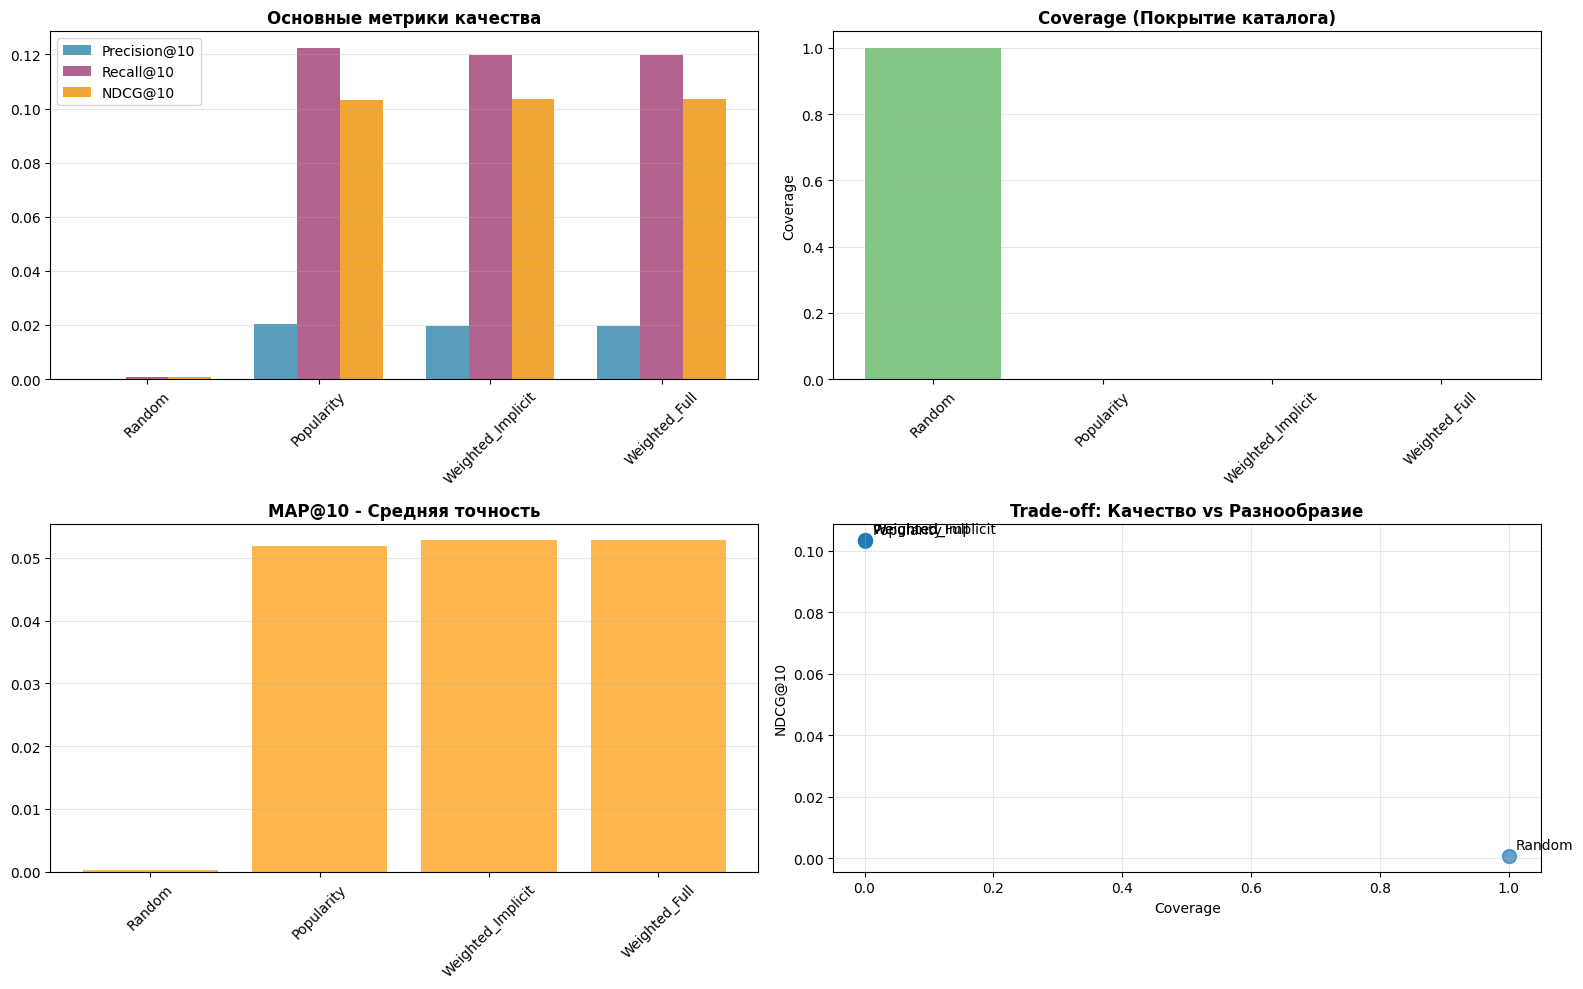

In [ ]:
# анализ результатов
print("АНАЛИЗ РЕЗУЛЬТАТОВ ОЦЕНКИ")
print("="*80)

# размер каталога
catalog_size = len(interactions['item_id'].unique())
print(f"Размер каталога: {catalog_size:,} фильмов")

# основные метрики качества
print("\nМЕТРИКИ КАЧЕСТВА РЕКОМЕНДАЦИЙ:")
quality_metrics = ['Precision@10', 'Recall@10', 'NDCG@10', 'MAP@10']
quality_results = results_df.groupby('Модель')[quality_metrics].mean().round(4)
display(quality_results)

# метрики разнообразия
print("\nМЕТРИКИ РАЗНООБРАЗИЯ:")
diversity_metrics = ['Coverage', 'Personal_Coverage']
diversity_results = results_df.groupby('Модель')[diversity_metrics].mean().round(4)
diversity_results['Coverage'] = diversity_results['Coverage'].apply(lambda x: f"{x:.2%}")
diversity_results['Personal_Coverage'] = diversity_results['Personal_Coverage'].apply(lambda x: f"{x:.2%}")
display(diversity_results)

# визуализация результатов
print("\nВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

models = results_df['Модель'].unique()
x_pos = np.arange(len(models))

# основные метрики качества
metrics_to_plot = ['Precision@10', 'Recall@10', 'NDCG@10']
colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, metric in enumerate(metrics_to_plot):
    values = [results_df[results_df['Модель'] == model][metric].mean() for model in models]
    ax1.bar(x_pos + i*0.25, values, width=0.25, label=metric, color=colors[i], alpha=0.8)

ax1.set_title('Основные метрики качества', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos + 0.25)
ax1.set_xticklabels(models, rotation=45)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# coverage сравнение
coverage_values = [results_df[results_df['Модель'] == model]['Coverage'].mean() for model in models]
ax2.bar(models, coverage_values, alpha=0.7, color='#4CAF50')
ax2.set_title('Coverage (Покрытие каталога)', fontsize=12, fontweight='bold')
ax2.set_xticklabels(models, rotation=45)
ax2.set_ylabel('Coverage')
ax2.grid(axis='y', alpha=0.3)

# MAP метрика
map_values = [results_df[results_df['Модель'] == model]['MAP@10'].mean() for model in models]
ax3.bar(models, map_values, alpha=0.7, color='#FF9800')
ax3.set_title('MAP@10 - Средняя точность', fontsize=12, fontweight='bold')
ax3.set_xticklabels(models, rotation=45)
ax3.grid(axis='y', alpha=0.3)

# trade-off: качество vs разнообразие
ax4.scatter(coverage_values,
           [results_df[results_df['Модель'] == model]['NDCG@10'].mean() for model in models],
           s=100, alpha=0.7)

for i, model in enumerate(models):
    ax4.annotate(model,
                (coverage_values[i], results_df[results_df['Модель'] == model]['NDCG@10'].mean()),
                xytext=(5, 5), textcoords='offset points')

ax4.set_xlabel('Coverage')
ax4.set_ylabel('NDCG@10')
ax4.set_title('Trade-off: Качество vs Разнообразие', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# анализ конкретных рекомендаций
print("АНАЛИЗ КОНКРЕТНЫХ РЕКОМЕНДАЦИЙ")
print("="*80)

def quick_recommendation_analysis(results_df, num_examples=5):
    """быстрый анализ рекомендаций лучшей модели"""

    best_model_name = results_df.loc[results_df['NDCG@10'].idxmax()]['Модель']
    print(f"Лучшая модель: {best_model_name}")
    print(f"Метод разделения: {best_split_name}")

    # используем уже выбранное разделение
    train_demo, test_demo = train, test

    # создаем лучшую модель
    all_items = interactions['item_id'].unique()
    if best_model_name == 'Random':
        best_model = ComprehensiveRecommender(all_items)
    elif best_model_name == 'Popularity':
        best_model = ComprehensivePopularityRecommender()
        best_model.fit(train_demo)
    elif best_model_name == 'Weighted_Implicit' and MATRICES_LOADED:
        best_model = WeightedMatrixRecommender(matrix_implicit, user_map, item_map)
        best_model.fit()
    elif best_model_name == 'Weighted_Full' and MATRICES_LOADED:
        best_model = WeightedMatrixRecommender(matrix_full_context, user_map, item_map)
        best_model.fit()
    else:
        best_model = ComprehensivePopularityRecommender()
        best_model.fit(train_demo)

    # анализ для нескольких пользователей
    user_sample = train_demo['user_id'].unique()[ :num_examples]

    for i, user_id in enumerate(user_sample, 1):
        print(f"\nПример {i}: Пользователь {user_id}")
        print("-" * 50)

        user_seen_items = set(train_demo[train_demo['user_id'] == user_id]['item_id'])
        user_test_items = set(test_demo[test_demo['user_id'] == user_id]['item_id']) if user_id in test_demo['user_id'].values else set()

        # рекомендации
        recommendations = best_model.recommend(user_seen_items, 5)

        print("Топ-5 рекомендации:")
        hits = 0
        for j, item_id in enumerate(recommendations[:5], 1):
            movie_info = get_movie_info(item_id)
            is_hit = "ПОПАДАНИЕ" if item_id in user_test_items else "-"
            if item_id in user_test_items:
                hits += 1

            print(f"   {j}. {is_hit} {movie_info['title']} ({movie_info['year']})")
            print(f"      {movie_info['genres']}")

        precision = hits / 5
        print(f"Precision: {precision:.0%} ({hits}/5)")

# запускаем быстрый анализ
quick_recommendation_analysis(results_df)

АНАЛИЗ КОНКРЕТНЫХ РЕКОМЕНДАЦИЙ
Лучшая модель: Weighted_Implicit
Метод разделения: Временное

Пример 1: Пользователь 691304
--------------------------------------------------
Топ-5 рекомендации:
   1. - Хрустальный (2021.0)
      триллеры, детективы
   2. - Клиника счастья (2021.0)
      драмы, мелодрамы
   3. - Гнев человеческий (2021.0)
      боевики, триллеры
   4. - Девятаев (2021.0)
      драмы, военные, приключения
   5. - Секреты семейной жизни (2021.0)
      комедии
Precision: 0% (0/5)

Пример 2: Пользователь 340483
--------------------------------------------------
Топ-5 рекомендации:
   1. - Хрустальный (2021.0)
      триллеры, детективы
   2. - Клиника счастья (2021.0)
      драмы, мелодрамы
   3. - Гнев человеческий (2021.0)
      боевики, триллеры
   4. - Девятаев (2021.0)
      драмы, военные, приключения
   5. - Секреты семейной жизни (2021.0)
      комедии
Precision: 0% (0/5)

Пример 3: Пользователь 257580
--------------------------------------------------
Топ-5 рекоменд

In [ ]:
# финальные выводы
print("ИТОГОВЫЕ ВЫВОДЫ")
print("="*80)

best_model = results_df.loc[results_df['NDCG@10'].idxmax()]

print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model['Модель']}")
print(f"   • NDCG@10: {best_model['NDCG@10']:.3f}")
print(f"   • Precision@10: {best_model['Precision@10']:.3f}")
print(f"   • Coverage: {best_model['Coverage']:.1%}")

print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"   • Каталог: {catalog_size:,} фильмов")
print(f"   • Пользователей оценено: {results_df['Пользователей_оценено'].mean():.0f}")

ИТОГОВЫЕ ВЫВОДЫ
ЛУЧШАЯ МОДЕЛЬ: Weighted_Implicit
   • NDCG@10: 0.104
   • Precision@10: 0.020
   • Coverage: 0.1%

ОБЩАЯ СТАТИСТИКА:
   • Каталог: 12,693 фильмов
   • Пользователей оценено: 75014
